Probabilistic Primality Tests
=============================
Cyrus B.

April 2019

## Fermat Primality Test
### Modular Congruency

($a$ and $b$ are positive real integers)


$ {a \equiv b \pmod{n}} $, reads "a is congruent to b".

This means that $a - b$ is divisible by $n$

### Fermat's Little Theorem

If $p$ is a prime number and $a$ is a positive integer less than $p$, _and_ $p$ does not divide $a$.


Then ${a^{p-1} \equiv 1 \pmod{p}}$

#### Quick Example

$ p = 7 $

$ a = 4 $

$ a^{p-1} = 4^{6} = 4096 $

$\frac{4096 - 1}{7} = 585$

### Primality Test

Fermat's little theorem can easily be used to find prime numbers. If we want to test the primality of a number, we simply plug it into the equation for $p$ then pick an $a$ such that $0 < a < p$ and p does not divide a. If p divides $a^{p-1}$ then we know p is (very likely) prime. $p$ is not necesarilly prime because there are some numbers, Carmichael numbers, that the Fermat Primality Test will identify as prime even though they are not. 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import time
import timeit
import math

In [3]:
def fpt(p):
    """
    Takes a number p and determines if it is (probably) prime
    Linear time efficiency O(n)
    """
    if p == 2:
        return True
    
    a = 2
    exp = a
    """
    I am defining exponentiation in this way so that I can show
    the difference in speed between normal exponentiation and
    exponentiation by doubling
    """
    for _ in range(1, p - 1):
        exp *= a
        
    return exp % p == 1

In [4]:
for i in range(2, 50):
    if fpt(i): print(i)

2
3
5
7
11
13
17
19
23
29
31
37
41
43
47


## Fast Modular Exponentiation

The bottleneck in the previous implementation of the FPT is that the exponentiation is a (relatively) slow operation. This can be signifigantly sped by using a divide and conquer exponentiation algorithm. Doing this brings our time efficiency down to $O(log(n))$, we get this speedup because by dealing with smaller numbers we can do modular multiplication instead of one large exponentiation and then a large modulus reduction.

In [5]:
def power(a, b, c):
    """
    a^b mod c
    """
    result = 1
    exp = b
    fact = a
    while exp > 0:
        if exp & 1:
            result = (result * fact) % c
        exp //= 2
        fact = (fact * fact) % c
    return result

def fpt_fastexp(p):
    """
    A very nice way to speed up the FPT algorithm is to
    use modular exponentiation by doubling.
    """
    if p == 2:
        return True
    a = 2
    return power(a, p - 1, p) == 1

In [6]:
for i in range(2, 50):
    if fpt_fastexp(i): print(i)

2
3
5
7
11
13
17
19
23
29
31
37
41
43
47


In [7]:
#Let's see how fast these algorithms are on some big mersenne primes
start = time.time()
fpt(2**20 - 1)
print(f"Simple FPT: {time.time() - start}")
start = time.time()
fpt_fastexp(2**20 - 1)
print(f"Divide and Conquer FPT: {time.time() - start}")

Simple FPT: 25.2138671875
Divide and Conquer FPT: 8.058547973632812e-05


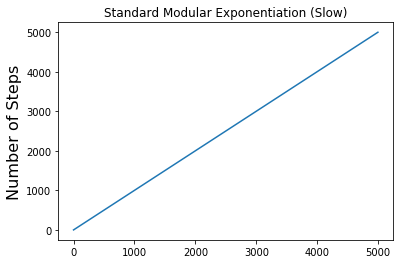

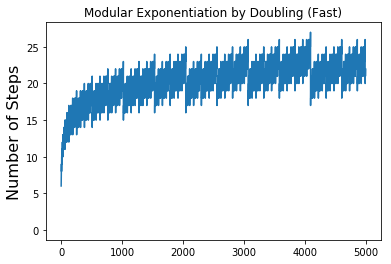

In [12]:
#Plotting Time!
#new versions of the functions that do stepcounting
stop = 5000

def sc_power(step_count, a, b, c):
    result = 1
    exp = b
    fact = a
    step_count += 2
    while exp > 0:
        if exp & 1:
            result = (result * fact) % c
            step_count += 1
        exp //= 2
        fact = (fact * fact) % c
        step_count += 1
    return step_count

def sc_fpt_fastexp(p):
    step_count = 0
    a = 2
    step_count += 1
    return sc_power(step_count, a, p - 1, p)

def sc_fpt(p):
    step_count = 0
    a = 2
    exp = a
    step_count += 2
    for _ in range(1, p - 1):
        exp *= a
        step_count += 1
    return step_count

graph1 = []
graph2 = []
for i in range(3, stop):
    graph1.append(sc_fpt(i))
    graph2.append(sc_fpt_fastexp(i))  

plt.plot(graph1)
plt.title("Standard Modular Exponentiation (Slow)")
plt.ylabel("Number of Steps", fontsize=16)
plt.show()
plt.plot(graph2)
plt.plot(logplot)
plt.title("Modular Exponentiation by Doubling (Fast)")
plt.ylabel("Number of Steps", fontsize=16)
plt.show()

### Carmichael Numbers (Fermat Pseudo-Primes)

As I said before, there are a small number of composite numbers that also obey Fermat's little theroem. Therefore according to this algorithm they are prime. This is why it is a probabilistic primality test. To be clear, there are other numbers that are incorrectly flagged as prime if we use $a$ as 2. However a can be any integer between 1 and $p$, Carmichael numbers have the property that they will still be considered prime according to this algorithm even if we test with every single $a$ from 1 to $p$.

In [21]:
#Some quick examples of Carmichael numbers
carmichaels = [561, 1105, 1729, 2465, 2821, 6601, 8911, 10585]
for i in carmichaels:
    print(fpt_fastexp(i))

True
True
True
True
True
True
True
True


Sources
=======

https://math.mit.edu/research/highschool/primes/materials/2014/Narayanan.pdf


https://en.wikipedia.org/wiki/Primality_test#Fermat_primality_test

https://crypto.stanford.edu/pbc/notes/numbertheory/exp.html

http://oeis.org/A002997